# Data Analysis with Pandas — Day 3
## Text Manipulation, Functions, Time Series

This is the Day 3 notebook for the June 2021 course "Data Analysis with Pandas," part of the [Text Analysis Pedagogy Institute](https://nkelber.github.io/tapi2021/book/intro.html).

In this lesson, we will cover:

* String Methods / Text Manipulation
* Applying Functions
* Converting Between Data Types
* Working with Time Series Data

___

## Dataset
### Seattle Public Library Book Circulation Data

This week, we will be working with [circulation data](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6) made publicly avilable by the Seattle Public Library. The dataset includes items that were checked out 20+ times in a month between January 2015 and June 2021.

For more information about this dataset, see the Seattle Public Library's [data portal](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6).
___

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [2]:
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 100

## Load Data

To read in a CSV file, we will use the function `pd.read_csv()` and insert the name of our desired file path. 

In [3]:
seattle_df = pd.read_csv('Seattle-Library_2015-2021.csv', delimiter=",", encoding="utf-8")

## Lingering Issues with SPL Data

So we've learned a lot about Pandas so far, and we've learned a lot about our Seattle Public Library data, too. Let's take a moment to appreciate how far we've come:

We've been able to get a broad overview of our data, subset our data in different ways, make simple plots, and even figure out the books and material types that were checked out most between 2015-2021. That's pretty awesome!

<img src="https://images-na.ssl-images-amazon.com/images/I/41txHpdA8QL.jpg" width=250/>


But unfortunately there are still some lingering problems and issues with our data.

For example, the titles in the dataset are sometimes recorded inconsistently and have slightly different versions. If we calculate the total checkouts for each title, we can see that Sue Grafton's *A" is for Alibi: Kinsey Millhone Series, Book 1* shows up multiple times in different ways.

In [4]:
seattle_df.groupby('Title')[['Checkouts']].sum()

,Checkouts
Title,
"""A"" is for Alibi: Kinsey Millhone Series, Book 1",583
"""A"" is for Alibi: Kinsey Millhone Series, Book 1 (unabridged)",21
"""A"" is for Alibi: Kinsey Millhone Series, Book 1 (unabridged) (Unabridged)",351
"""All the Real Indians Died Off"": And 20 Other Myths About Native Americans (unabridged) (Unabridged)",386
"""Awaken, My Love!""",23
...,...
reputation,180
untitled unmastered.,24
¡Vamos! Let's go to the market / by Raúl the Third ; colors by Elaine Bay.,22


There are other small inconsistencies in the data, too, such as trailing commas in the "Publishers" column, which make it more difficult for us to get a true sense of publishing trends.

In [5]:
seattle_df['Publisher'].value_counts()[:40]

Random House, Inc.                                18920
Books on Tape                                     13479
Random House,                                     12139
Penguin Group (USA), Inc.                          9575
HarperCollins Publishers Inc.                      8639
Hachette Digital, Inc.                             6867
Sony Pictures Home Entertainment,                  5981
Macmillan Publishers                               5220
Blackstone Audio, Inc.                             5171
[Publisher not identified],                        5148
Simon & Schuster, Inc.                             3810
20th Century Fox Home Entertainment,               3724
Universal Pictures Home Entertainment,             3580
Lionsgate,                                         3577
Harper, an imprint of HarperCollinsPublishers,     3456
Warner Home Video,                                 3436
Universal Studios Home Entertainment,              3210
Scholastic Inc.,                                

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/16/Penguin_Random_House.svg/1200px-Penguin_Random_House.svg.png" width=250/>


Additionally, when we try to filter for a particular title, like Elena Ferrante's *My Brilliant Friend*, we have to know the full and complete title for our filtering method to work (pssst can you tell that I'm obsessed with Elena Ferrante yet...?) 

Here's what happens when we filter the DataFrame for just "My Brilliant Friend"...

In [6]:
# Boolean vector
title_filter = seattle_df['Title'] == 'My Brilliant Friend'

# Filter
seattle_df[title_filter]

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType


Nothing. No dice. 🎲

Using this filter method, we have to specify the entire title to get what we're looking for, which is challenging and annoying.

In [7]:
# Boolean vector
title_filter = seattle_df['Title'] == 'My Brilliant Friend: Neapolitan Series, Book 1'

# Filter
seattle_df[title_filter].head()

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
597,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,71,2016,10,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive
5762,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,53,2016,11,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive
8341,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,37,2016,12,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive
11640,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,29,2017,1,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive
15207,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,29,2015,1,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive


Lastly, our "Subjects" column still includes multiple subjects in manys rows, so we don't know very much about overall "Subject" trends.

In [8]:
seattle_df['Subjects']

0                                          Friendship Fiction, Frogs Juvenile fiction, Toads Juvenile fiction
1                                                                    Friendship Fiction, Naples Italy Fiction
2         Kirk James T 2233 2371 Drama, Spock Mr Drama, Space ships Drama, Manned space flight Drama, Huma...
3                                                                                    Fiction, Science Fiction
4                                                                                  Fantasy, Fiction, Thriller
                                                         ...                                                 
282282                                                     Sociology, African American Nonfiction, Nonfiction
282283                       Women Black Great Britain Fiction, Great Britain Social life and customs Fiction
282284                                                        Business, Finance, Self-Improvement, Nonfiction
282285    

Plus we still don't have any datetime information.

In [9]:
seattle_df['CheckoutYear'].dtype

dtype('int64')

But don't fret. We're going to resolve all of these lingering issues in this notebook!

## String Methods

We can clean up many of the inconsistencies in our data by using Pandas string methods.

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title"><b/>Python Review 🐍 </b></p>

The Python data type for textual data is a "string." Strings are denoted by single or double quotation marks.

| Data Type       | Explanation          | Example  |
| ------------- |:-------------:| -----:|
| String     | Text | ```"brilliant", '40'``` |
| Integer     | Whole Numbers      |   ```40``` |
| Float | Decimal Numbers      |   ```40.2``` |
| Boolean | True/False     |   ```False``` |

There are a number of convenient, built-in Python methods that allow you to manipulate and work with strings, such as stripping leading and trailing whitespace or replacing certain characters.

| **String Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `string.lower()`         | makes the string lowercase                                                   
| `string.strip()`         | removes lead and trailing white spaces     |
| `string.replace('old string', 'new string')`      | replaces `old string` with `new string`          |
| `string.split('delim')`          | returns a list of substrings separated by the given delimiter |

                                                            
</div

Let's assign the string "?My Brilliant Friend?" to the variable `sample_string`.

In [10]:
sample_string = "?My Brilliant Friend?"

When we check its data type, we can see that it is indeed a string.

In [11]:
type(sample_string)

str

Thus, we can strip leading and trailing characters.

In [12]:
sample_string.strip('?')

'My Brilliant Friend'

And we can make the entire string uppercase.

In [13]:
sample_string.upper()

'?MY BRILLIANT FRIEND?'

Well, Pandas has special [Pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods), too. Many of them are very similar to Python string methods, except they will transform every single string value in a column, and we need to add `.str` to the method chain.

Here's a sample of Pandas string methods (you can see a full account in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary). 

| **Pandas String Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| df['column_name']`.str.lower()`         | makes the string in each row lowercase                                                                                |
| df['column_name']`.str.upper()`         | makes the string in each row uppercase                                                |
| df['column_name']`.str.title()`         | makes the string in each row titlecase                                                |
| df['column_name']`.str.replace('old string', 'new string')`      | replaces `old string` with `new string` for each row |
| df['column_name']`.str.contains('some string')`      | tests whether string in each row contains "some string" |
| df['column_name']`.str.split('delim')`          | returns a list of substrings separated by the given delimiter |
| df['column_name']`.str.join(list)`         | opposite of split(), joins the elements in the given list together using the string                                                                        |
                                                            

To transform all the values in the "MaterialType" column to lower case, we can use `.str.lower()` 

In [14]:
seattle_df['MaterialType']

0              BOOK
1              BOOK
2         VIDEODISC
3             EBOOK
4             EBOOK
            ...    
282282        EBOOK
282283         BOOK
282284    AUDIOBOOK
282285        EBOOK
282286        EBOOK
Name: MaterialType, Length: 282287, dtype: object

In [15]:
seattle_df['MaterialType'].str.lower()

0              book
1              book
2         videodisc
3             ebook
4             ebook
            ...    
282282        ebook
282283         book
282284    audiobook
282285        ebook
282286        ebook
Name: MaterialType, Length: 282287, dtype: object

We can also try to clean up some of the inconsistencies in our data by stripping trailing commas with `.str.strip(,)`.

Here are the top 15 most frequent values in the "Publisher" column before we do any clean up.

In [16]:
seattle_df['Publisher'].value_counts()[:15]

Random House, Inc.                                18920
Books on Tape                                     13479
Random House,                                     12139
Penguin Group (USA), Inc.                          9575
HarperCollins Publishers Inc.                      8639
Hachette Digital, Inc.                             6867
Sony Pictures Home Entertainment,                  5981
Macmillan Publishers                               5220
Blackstone Audio, Inc.                             5171
[Publisher not identified],                        5148
Simon & Schuster, Inc.                             3810
20th Century Fox Home Entertainment,               3724
Universal Pictures Home Entertainment,             3580
Lionsgate,                                         3577
Harper, an imprint of HarperCollinsPublishers,     3456
Name: Publisher, dtype: int64

Now let's strip commas.

In [17]:
seattle_df['Publisher'] = seattle_df['Publisher'].str.strip(',')

Here are the top 15 most frequent values after our text manipulation. Looks a little better!

In [18]:
seattle_df['Publisher'].value_counts()[:15]

Random House, Inc.                       18922
Books on Tape                            13515
Random House                             12275
Penguin Group (USA), Inc.                 9575
HarperCollins Publishers Inc.             8639
Hachette Digital, Inc.                    6867
Sony Pictures Home Entertainment          5996
Macmillan Publishers                      5220
Blackstone Audio, Inc.                    5174
[Publisher not identified]                5148
Simon & Schuster, Inc.                    3814
20th Century Fox Home Entertainment       3724
Lionsgate                                 3662
Universal Pictures Home Entertainment     3581
Warner Home Video                         3470
Name: Publisher, dtype: int64

We can also use `df.str.contains()` to search for whether a row contains a string, like *My Brilliant Friend*, even if it doesn't match the title exactly.

If there are `NaN` values in a column, we can also choose to ignore them with `na = False`.

In [19]:
# Boolean vector
title_filter = seattle_df['Title'].str.contains('My Brilliant Friend', na=False)

# Filter
seattle_df[title_filter].sample(10)

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType
8341,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,37,2016,12,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive
222647,"My Brilliant Friend: Neapolitan Series, Book 1 (unabridged) (Unabridged)",Elena Ferrante,AUDIOBOOK,91,2019,9,"Blackstone Audio, Inc.",2015,"Fiction, Literature",Digital,OverDrive
46590,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,34,2015,9,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive
195022,"My Brilliant Friend: Neapolitan Series, Book 1 (unabridged) (Unabridged)",Elena Ferrante,AUDIOBOOK,33,2019,2,"Blackstone Audio, Inc.",2015,"Fiction, Literature",Digital,OverDrive
235101,"My Brilliant Friend: Neapolitan Series, Book 1 (unabridged) (Unabridged)",Elena Ferrante,AUDIOBOOK,79,2019,12,"Blackstone Audio, Inc.",2015,"Fiction, Literature",Digital,OverDrive
50379,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,52,2015,10,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive
262429,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,26,2020,10,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive
196186,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,30,2019,2,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive
53112,"My Brilliant Friend: Neapolitan Series, Book 1 (unabridged) (Unabridged)",Elena Ferrante,AUDIOBOOK,26,2015,10,"Blackstone Audio, Inc.",2015,"Fiction, Literature",Digital,OverDrive
115500,"My Brilliant Friend: Neapolitan Series, Book 1",Elena Ferrante,EBOOK,33,2017,6,"Penguin Group (USA), Inc.",2013,"Fiction, Literature",Digital,OverDrive


We can also test whether a row contains a certain word/phrase OR (`|`) other words/phrases. Additionally, we can choose to ignore case.

In [20]:
# Boolean vector
title_filter = seattle_df['Title'].str.contains('(my brilliant friend|story of a new name)',
                                                na=False, case = False)

# Filter
seattle_df[title_filter]['Title'].value_counts()

/Users/melaniewalsh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


My Brilliant Friend: Neapolitan Series, Book 1                                                                   77
My Brilliant Friend: Neapolitan Series, Book 1 (unabridged) (Unabridged)                                         59
My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by Ann Goldstein.    52
The Story of a New Name: Neapolitan Series, Book 2                                                               28
Story of a new name / Elena Ferrante ; translated from the Italian by Ann Goldstein.                             12
My brilliant friend. The complete first season / Home Box Office ; directed by Saverio Costanzo.                 11
The story of a new name / Elena Ferrante ; translated from the Italian by Ann Goldstein.                          8
The Story of a New Name: Neapolitan Series, Book 2 (unabridged) (Unabridged)                                      7
My Brilliant Friend: Neapolitan Series, Book 1 (unabridged)             


| Regular Expression Pattern       | Matches |
|:---------------------------:|:-----------------------------------------------------------------------------------------------------------:|
| `.` | any character                                         | 
| `\w` | word                                         | 
| `\W`                      | NOT word                                           |  
| `\d` | digit                                         | 
| `\D`                      | NOT digit                                           | 
| `\s` | whitespace                                         | 
| `\S`                      | NOT whitespace                                          | 
| `[abc]`                      | Any of abc                                         |
| `[^abc]`                      | Not any of abc                                         | 
| `(abc)`                      | Specific capture of "abc"                                         
| `+`                      | 1 or more instances                                       | 
| `*`                      | 0 or more instances                                         | 
| `?`                      | 0 or 1 instance                                        | 
| `{number}`                      | any specific number of instances                                        | 

                   


We can also use regular expressions with `.str.contains()`. For example, we could search for anything that has 4 numbers in a row `\d{4}`.

In [21]:
# Boolean vector
title_filter = seattle_df['Title'].str.contains('\d{4}',
                                                na=False, case = False, regex=True)

# Filter
seattle_df[title_filter]['Title'].value_counts()

The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics                                                                                                                                                   77
1984 (Unabridged)                                                                                                                                                                                                                                69
Captain Underpants and the tyrannical retaliation of the Turbo Toilet 2000 / the eleventh epic novel by Dav Pilkey.                                                                                                                              62
1984                                                                                                                                                                                                                                             60
The Boys in the Boat: Ni

## Applying Functions

| **Pandas Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| df['column_name']`.apply(function_name)`         | Call function on every row in column                                                                                |
| df`.apply(function_name, axis='columns')`         | Call function on every row in DataFrame                                                |

Perhaps we want to create a Python function that will clean up our data in a more nuanced and comprehensive way.

For example, our "PublicationYear" column has a lot of irregularity. Many of the values are surrounded by square brackets`[]`, begin with the letter `c`, end with a period, or include multiple years (presumably a copyright year and a reissue year).

In [22]:
seattle_df['PublicationYear'].value_counts()

[2015]            19447
[2016]            18450
2017              17659
2016              17313
[2017]            16256
                  ...  
[2011], c1975.        1
[2007], 2005.         1
2007, c1998.          1
c1959.                1
1958                  1
Name: PublicationYear, Length: 608, dtype: int64

Lucky for us, Pandas makes it easy to apply functions to DataFrame and Series objects.

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title"><b/>Python Review 🐍 </b></p>

Python functions enable you to bundle up code and call that code whenever you need it. There are a number of built-in Python functions, such as:
- `print()`
- `len()`
- `type()`

To create a Python function of your own, you need to begin with the keyword `def`, short for define. Then you give the function a name followed by parenthesis, and often you specify an argument that it will accept inside the parenthesis, followed by a colon.

```
def clean_year(year):
    year = year.replace('[', '')
    year = year.replace(']', '')
    return year

clean_year("[2012]")  
"2012"  
```

Then you move to the next line, indent, and include the code that you want to be run when you "call" the function.

Finally, you typically end with a `return` statement that will return a certain value(s).  


</div>

To use a Python function on a DataFrame or Series object, you use `.apply()` and give the name of the desired function as an argument. This means the function will be called on every row in the DataFrame or every column.

To make a useful Python function for your DataFrame/column, it can be useful to think about making a function that will work well on a single value, like "c[2012]. " or "c2012 2020.  " For these values, we want to remove characters like `[` or `c`, strip whitespace, and find a way to deal with multiple years. To make things simple, let's simply return "Unknown" if there is more than one year listed.

In [23]:
def clean_year(year):
    
    # Convert number to string
    year = str(year)
    # Replace characters
    year = year.replace('[', '')
    year = year.replace(']', '')
    year = year.replace('-', '')
    year = year.replace(',', '')
    year = year.replace('.', '')
    year = year.replace('©', '')
    year = year.replace('c', '')
    year = year.replace('?', '')
    # Strip whitespace
    year = year.strip()
    
    # If there are more than 4 characters, return Unknown 
    if len(year) > 4:
        year = 'Unknown'
        
    return year

Let's test out the function on single values.

In [24]:
clean_year("c[2012].  ")

'2012'

In [25]:
clean_year("c2012 2020.  ")

'Unknown'

Great! It works. Now let's apply the function to the entire column. Note that when we apply the function, we simply give the name and do not call it with parenthesis.

In [26]:
seattle_df['PublicationYear'].apply(clean_year)

0         1976
1         2012
2         2009
3         2012
4         2015
          ... 
282282    2013
282283    2019
282284    2018
282285    2012
282286    2019
Name: PublicationYear, Length: 282287, dtype: object

Once we clean up the "PublicationYear" column, it looks a lot better.

In [27]:
seattle_df['PublicationYear'] = seattle_df['PublicationYear'].apply(clean_year)

seattle_df['PublicationYear'].value_counts()

2016       36411
2015       36215
2017       34637
2018       28444
2014       27068
2019       20161
2013       18097
2012       12365
2020       10573
2011        9090
nan         7773
2010        6751
2009        5722
2008        3696
Unknown     3534
2006        3083
2007        3003
2005        2127
2021        1404
2004        1081
2003        1039
2000         812
2002         743
1999         665
1998         627
2001         565
1997         304
1961         261
1960         255
1996         225
1958         216
1993         207
1978         207
1995         201
1962         201
1991         200
1987         197
1963         193
1972         180
1984         178
1994         168
1979         167
1964         162
1970         160
1989         158
1968         148
1974         147
1980         130
1985         122
1981         122
1982         121
1992         113
1975         109
1957         106
1973         104
1990          94
1965          94
1988          93
1971          

You may have noticed that there are a lot of different variations of the titles, as well.

Let's make a function that attempts to aggregate titles of the same name. Note that we're using more regular expressions here. Python functions allow you to get as fancy as you want!

In [28]:
import re

def clean_title(title):
    
    # Replace some words
    title = title.lower().replace('(unabridged)', '')
    title = title.lower().replace(': a novel', '')
    
    # Use regex expression to remove everything after / or :
    # Test to see if there is a / character
    if re.search('.+?(?=/)/', title):
        # If so, pull out the text before the / character
        title = re.search('.+?(?=/)/', title).group(0)
    
    # Test to see if there is a : character
    if re.search('.+?(?=:)', title):
        # If so, pull out the text before the / character
        title = re.search('.+?(?=:)', title).group(0)
    
    # Strip character and whitespace
    title = title.strip('/')
    title = title.strip()
    
    title = title.title()
    
    return title

Make sure to run this cell!

In [29]:
seattle_df['Title'] = seattle_df['Title'].apply(clean_title)

<div class="admonition note" name="html-admonition" style="background: lightyellow; padding: 10px">
<p class="Question"><b/>❓ Question</b></p>

How dominant are the "Big 5" Publishers — Penguin/Random House, Harper Collins, Hachette, Simon & Schuster, and Macmillan — in the Seattle Public Library system?

To answer this question, we need to `.apply()` a function.
</div>

It's hard to get a sense of publishing trends in this dataset because there are a lot of different values for the same publisher — not only slight differences like "Random House, Inc." and "Random House" but bigger differences, too, like the fact that "Viking" is *owned* by Penguin/Random House.

Can we account for these nuances?

In [30]:
seattle_df['Publisher'].value_counts()[:35]

Random House, Inc.                               18922
Books on Tape                                    13515
Random House                                     12275
Penguin Group (USA), Inc.                         9575
HarperCollins Publishers Inc.                     8639
Hachette Digital, Inc.                            6867
Sony Pictures Home Entertainment                  5996
Macmillan Publishers                              5220
Blackstone Audio, Inc.                            5174
[Publisher not identified]                        5148
Simon & Schuster, Inc.                            3814
20th Century Fox Home Entertainment               3724
Lionsgate                                         3662
Universal Pictures Home Entertainment             3581
Warner Home Video                                 3470
Harper, an imprint of HarperCollinsPublishers     3460
Universal Studios Home Entertainment              3218
Scholastic Inc.                                   3131
Alfred A. 

In [32]:
def big_5_checker(publisher):
    
    # Make lowercase to catch variations
    publisher = publisher.lower()
    
    # Test to see if certain words are in the row, then return corresponding publisher
    if "random house" in publisher or "penguin" in publisher or "knopf" in publisher or "viking" in publisher or "ballantine" in publisher:
        return "Penguin/Random House"
    elif "harper" in publisher:
        return "Harper Collins"
    elif "simon" in publisher:
        return "Simon & Schuster"
    elif "hachette" in publisher:
        return "Hachette"
    elif "macmillan" in publisher:
            return "Macmillan"
    else:
        return "Other"

Let's test out the function on single values.

In [33]:
big_5_checker("Simon & Schuster - Audiobooks")

'Simon & Schuster'

In [34]:
big_5_checker("Viking,")

'Penguin/Random House'

Nice! It's working. Let's apply it to the column.

In [35]:
seattle_df['Big 5'] = seattle_df['Publisher'].apply(big_5_checker)

AttributeError: 'float' object has no attribute 'lower'

Uh oh! We've gotten an error. The error reports that we can't use a string method, `.lower()`, on a `float` data type, which is likely a `NaN`.

One way that we could handle this error is to simply drop `NaN` values before we apply the function with `.dropna()`.

In [36]:
seattle_df['Big 5'] = seattle_df['Publisher'].dropna().apply(big_5_checker)

In [37]:
seattle_df[['Title', 'MaterialType', 'Checkouts', 'Publisher','Big 5']].sample(15)

,Title,MaterialType,Checkouts,Publisher,Big 5
86948,We Are Still Here [Videorecording],VIDEODISC,21,[Publisher not identified],Other
228065,Little,VIDEODISC,97,Universal Studios,Other
81379,Listen Up Philip [Videorecording],VIDEODISC,23,[Publisher not identified],Other
53952,Orange Is The New Black. Season One [Videorecording],VIDEODISC,112,Lions Gate Entertainment,Other
180110,Ariel Is Fearless,BOOK,26,Random House,Penguin/Random House
157107,Grant,BOOK,54,Penguin Press,Penguin/Random House
224327,Harry Potter And The Order Of The Phoenix,AUDIOBOOK,84,Pottermore,Other
160033,Garfield Feeds His Face,BOOK,59,Ballantine Books,Penguin/Random House
201857,The Legend Of Rock Paper Scissors,BOOK,25,Balzer + Bray,Other
77158,As Time Goes By,EBOOK,23,"Simon & Schuster, Inc.",Simon & Schuster


In [38]:
seattle_df['Big 5'].value_counts()

Other                   174420
Penguin/Random House     54317
Harper Collins           20495
Simon & Schuster         10458
Macmillan                 8344
Hachette                  7638
Name: Big 5, dtype: int64

<div class="admonition note" name="html-admonition" style="background: lightyellow; padding: 10px">
<p class="Question"><b/>❓ Question</b></p>

What are the most common "Subjects" in the Seattle Public Library circulation data between 2015-2021?
</div>

Another lingering issue with this data is that the "Subjects" column contains a list of different subjects in each row, making it difficult to understand overall subject borrowing patterns.

This is a tricky probelm and a case where we might want to call a Python function on the entire column, not just apply a function to each row of the column.

In [39]:
seattle_df['Subjects'].value_counts()[:15]

Fiction, Literature                              10302
Fiction, Mystery, Suspense, Thriller              4347
Fiction, Historical Fiction, Literature           2698
Fiction, Suspense, Thriller                       2635
Fiction, Mystery                                  2007
Fiction, Literature, Suspense, Thriller           1987
Fiction, Literature, Romance                      1932
Fiction, Science Fiction                          1732
Fantasy, Fiction                                  1688
Fiction, Thriller                                 1395
Fiction, Humor (Fiction), Literature              1093
Fiction, Historical Fiction                       1084
Fiction, Literature, Thriller                     1054
Fiction, Humor (Fiction), Literature, Romance     1045
Fiction, Mystery, Thriller                        1029
Name: Subjects, dtype: int64

Let's make a function that will accept an entire Pandas Series as an argument ("Subjects"), consider each row in the Series/column, split the row into a list based on comma separation, add each item to a list, and then make that list into its own Pandas Series object.

In [40]:
def count_upper_subjects(subjects_column):
    
    # Empty list
    list_of_subjects = []
    
    # For each item's subjects in the entire column
    for item_subjects in subjects_column:
        
        # Split on comma
        item_subjects = item_subjects.split(',')
        
        for item_subject in item_subjects:

            item_subject = item_subject.replace(',', '')
            item_subject = item_subject.strip(',')
            item_subject = item_subject.strip()

            # Add to big list
            list_of_subjects.append(item_subject)
    
    return pd.Series(list_of_subjects)

If we call the function and give the "Subjects" column as an argument, we get a Series object of individual titles.

In [41]:
count_upper_subjects(seattle_df['Subjects'].dropna())

0              Friendship Fiction
1          Frogs Juvenile fiction
2          Toads Juvenile fiction
3              Friendship Fiction
4            Naples Italy Fiction
                    ...          
1427602          Juvenile Fiction
1427603       Juvenile Literature
1427604                    Essays
1427605                 Sociology
1427606                Nonfiction
Length: 1427607, dtype: object

And because it is a Series, we can use `.value_counts()` to count them all up. It seems to look ok, but...

In [42]:
count_upper_subjects(seattle_df['Subjects'].dropna()).value_counts()[:40]

Video recordings for the hearing impaired               69160
Fiction                                                 55956
Feature films                                           54319
Fiction films                                           49825
Literature                                              28086
Nonfiction                                              27225
Video recordings for people with visual disabilities    21126
Thriller                                                18317
Fiction television programs                             17160
Television series                                       13955
Action and adventure films                              13338
Fantasy                                                 12869
Comedy films                                            12849
Suspense                                                12111
Mystery                                                 11289
Cartoons and comics                                     10726
Graphic 

...if we examine the last items in the Series, we can see that this method certainly isn't perfect. 

In [ ]:
count_upper_subjects(seattle_df['Subjects'].dropna()).value_counts()[-40:]

It appears that some subjects in this dataset, like "Women immigrants Australia Drama", are NOT separated by commas. If we were really interested in this information, we would need to spend more time creating a function that could capture all the contingencies.

## Converting Data Types

| **Pandas Data Convert Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `df['column_name'].astype(str/int/float)`         | Convert column to a different data type                                                                                |
| `pd.to_numeric(df['column_name'], errors='coerce')`         | Convert column to numerical data, with option to convert errors to `NaN`                                              |
| `pd.to_datetime(df['column_name'], format='&Y-%M')`         | Convert column to datetime, specify date input format                                               |

In the last section, we cleaned up a lot of our "PublicationYear" column. So now we should be able to filter the data and only look at works that were published in the 1970s...right?

In [43]:
seventies_filter = (seattle_df['PublicationYear'] >= 1970) & (seattle_df['PublicationYear'] < 1980)

seattle_df[seventies_filter]

TypeError: '>=' not supported between instances of 'str' and 'int'

Drat! We're getting an error message that says we can't use `>=` on a string object. If we remember, we do have string values in this column: "Unknown."

In [44]:
seattle_df['PublicationYear']

0         1976
1         2012
2         2009
3         2012
4         2015
          ... 
282282    2013
282283    2019
282284    2018
282285    2012
282286    2019
Name: PublicationYear, Length: 282287, dtype: object

One way to convert between Pandas data types is to use `.astype()`. 

For example, the column "CheckoutYear" is an integer.

In [45]:
seattle_df['CheckoutYear']

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
282282    2021
282283    2021
282284    2021
282285    2021
282286    2021
Name: CheckoutYear, Length: 282287, dtype: int64

But if we wanted to make it an object instead, we could use `.astype()`.

In [46]:
seattle_df['CheckoutYear'].astype(str)

0         2016
1         2016
2         2016
3         2016
4         2016
          ... 
282282    2021
282283    2021
282284    2021
282285    2021
282286    2021
Name: CheckoutYear, Length: 282287, dtype: object

So let's try it out on "PublicationYear"...

In [47]:
seattle_df['PublicationYear'].astype(int)

ValueError: invalid literal for int() with base 10: 'nan'

Double drat! We can't convert a `NaN` into an integer because it's a `float`.

So instead we'll need to use a different way of converting to numeric data — specficially, `pd.to_numeric()`, which includes an option for converting any problematic data into a `NaN`.

In [48]:
pd.to_numeric(seattle_df['PublicationYear'], errors='coerce')

0         1976.0
1         2012.0
2         2009.0
3         2012.0
4         2015.0
           ...  
282282    2013.0
282283    2019.0
282284    2018.0
282285    2012.0
282286    2019.0
Name: PublicationYear, Length: 282287, dtype: float64

In [49]:
seattle_df['PublicationYear'] = pd.to_numeric(seattle_df['PublicationYear'], errors='coerce')

In [50]:
seventies_filter = (seattle_df['PublicationYear'] >= 1970) & (seattle_df['PublicationYear'] < 1980)

seattle_df[seventies_filter].sample(10)

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType,Big 5
51324,The Best American Short Stories.,NaN,CR,30,2015,10,Houghton Mifflin,1978.0,Short stories American Periodicals,Physical,Horizon,Other
135133,I Can Read With My Eyes Shut,"Seuss, Dr.",BOOK,32,2017,11,Beginner Books,1978.0,"Reading Juvenile fiction, Stories in rhyme",Physical,Horizon,Other
171293,Frog And Toad Are Friends,"Lobel, Arnold",BOOK,32,2018,8,"Harper & Row, Publishers",1970.0,"Friendship Juvenile fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon,Harper Collins
56248,Great Day For Up! Pictures By Quentin Blake.,"Seuss, Dr.",BOOK,39,2015,11,Beginner Books,1974.0,Stories in rhyme,Physical,Horizon,Other
140407,Frog And Toad Are Friends,"Lobel, Arnold",BOOK,35,2017,12,"Harper & Row, Publishers",1970.0,"Friendship Juvenile fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon,Harper Collins
75511,The Berenstain Bears And The Spooky Old Tree,"Berenstain, Stan, 1923-2005",BOOK,21,2016,4,Beginner Books,1978.0,Bears Juvenile fiction,Physical,Horizon,Other
47455,Frog And Toad Are Friends,"Lobel, Arnold",BOOK,40,2015,9,"Harper & Row, Publishers",1970.0,"Friendship Juvenile fiction, Frogs Juvenile fiction, Toads Juvenile fiction",Physical,Horizon,Harper Collins
69856,Richard Scarry'S What Do People Do All Day?,"Scarry, Richard",BOOK,22,2016,3,Random House,1979.0,Occupations Juvenile literature,Physical,Horizon,Penguin/Random House
6939,"Marvin K. Mooney, Will You Please Go Now!","Seuss, Dr.",BOOK,23,2016,11,Random House,1972.0,Stories in rhyme,Physical,Horizon,Penguin/Random House
39119,Mouse Tales.,"Lobel, Arnold",BOOK,20,2015,7,Harper & Row,1972.0,Short stories,Physical,Horizon,Harper Collins


In [51]:
null_filter = seattle_df['PublicationYear'].isna()

seattle_df[null_filter].sample(3)

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType,Big 5
157983,Car And Driver,NaN,MAGAZINE,38,2018,5,NaN,NaN,NaN,Digital,Zinio,NaN
156001,Reader'S Digest,NaN,MAGAZINE,39,2018,4,NaN,NaN,NaN,Digital,Zinio,NaN
76299,Country Living,NaN,MAGAZINE,48,2016,4,NaN,NaN,NaN,Digital,Zinio,NaN


## Converting to Datetime

| **Pandas Data Convert Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `pd.to_datetime(df['column_name'], format='&Y-%M')`         | Convert column to datetime, specify date input format                                               |

<div class="admonition note" name="html-admonition" style="background: lightyellow; padding: 10px">
<p class="Question"><b/>❓ Question</b></p>

How do Seattle Public Library checkouts between 2015-2021 fluctuate *month by month*?
</div>

In the last notebook, we were able to create a pretty basic plot of checkouts between 2015-2021 by year.

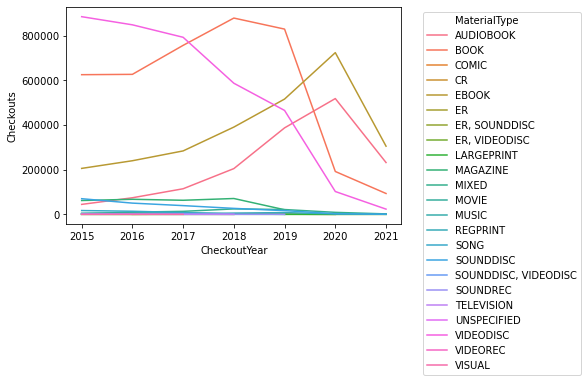

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

materialtype_checkouts_byyear = seattle_df.groupby(['MaterialType', 'CheckoutYear'])\
                                [['Checkouts']].sum().reset_index()

# Use Seaborn to make a line plot
sns.lineplot(data=materialtype_checkouts_byyear,
             x='CheckoutYear', y='Checkouts', hue='MaterialType')

# Put legend to the right
plt.legend(bbox_to_anchor=(1.05, 1))

But we couldn't get more granular than that, because we don't currently have a column with more granular date information.

However, we do have a column with the check out year and the check out month, so let's try to combine that information together!

In [53]:
seattle_df[['Title', 'Checkouts', 'CheckoutYear', 'CheckoutMonth']]

,Title,Checkouts,CheckoutYear,CheckoutMonth
0,Frog And Toad All Year,34,2016,10
1,My Brilliant Friend,110,2016,10
2,Star Trek [Videorecording],36,2016,10
3,The Man In The High Castle,63,2016,10
4,The Fifth Season,44,2016,10
...,...,...,...,...
282282,The Fire Next Time,23,2021,5
282283,"Girl, Woman, Other",22,2021,5
282284,Your Money Or Your Life,30,2021,5
282285,Harry Potter And The Order Of The Phoenix,32,2021,5


One option for combining this data together is to simply concatenate the columns together.

In [54]:
seattle_df['CheckoutYear'] + seattle_df['CheckoutMonth']

0         2026
1         2026
2         2026
3         2026
4         2026
          ... 
282282    2026
282283    2026
282284    2026
282285    2026
282286    2026
Length: 282287, dtype: int64

Oops! Since these are integers, when we try to concatenate them together, we're just adding them together. To concatenate them, we need to convert them to string objects.

In [55]:
seattle_df['CheckoutYear'].astype(str) + '-' + seattle_df['CheckoutMonth'].astype(str)

0         2016-10
1         2016-10
2         2016-10
3         2016-10
4         2016-10
           ...   
282282     2021-5
282283     2021-5
282284     2021-5
282285     2021-5
282286     2021-5
Length: 282287, dtype: object

That's better! Let's make a new column with the check out year and month combined.

In [56]:
seattle_df['CheckoutYearMonth'] = seattle_df['CheckoutYear'].astype(str) + '-' + seattle_df['CheckoutMonth'].astype(str)

To explicitly make this column into datetime data, we need to use `pd.to_datetime(format=%Y-%m)` and specify the date format of our inputs (here are the [codes for datetime formatting](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)).

In [57]:
pd.to_datetime(seattle_df['CheckoutYearMonth'], format='%Y-%m')

0        2016-10-01
1        2016-10-01
2        2016-10-01
3        2016-10-01
4        2016-10-01
            ...    
282282   2021-05-01
282283   2021-05-01
282284   2021-05-01
282285   2021-05-01
282286   2021-05-01
Name: CheckoutYearMonth, Length: 282287, dtype: datetime64[ns]

If we specificed that this information was year and day `format=%Y-%d`, rather than month, then it would interpret the second numerical value as day information.

In [58]:
pd.to_datetime(seattle_df['CheckoutYearMonth'], format='%Y-%d')

0        2016-01-10
1        2016-01-10
2        2016-01-10
3        2016-01-10
4        2016-01-10
            ...    
282282   2021-01-05
282283   2021-01-05
282284   2021-01-05
282285   2021-01-05
282286   2021-01-05
Name: CheckoutYearMonth, Length: 282287, dtype: datetime64[ns]

In [59]:
seattle_df['Date'] = pd.to_datetime(seattle_df['CheckoutYearMonth'], format='%Y-%m')

In [60]:
seattle_df['Date']

0        2016-10-01
1        2016-10-01
2        2016-10-01
3        2016-10-01
4        2016-10-01
            ...    
282282   2021-05-01
282283   2021-05-01
282284   2021-05-01
282285   2021-05-01
282286   2021-05-01
Name: Date, Length: 282287, dtype: datetime64[ns]

<div class="admonition warning" name="html-admonition" style="background: pink; padding: 10px">
<p class="title"><b/>Note</b></p>


Note that if you have three columns in your DataFrame that have the titles "year," "month," and "day," you can also make them a single datetime object in one fell swoop.
</div>

In [61]:
seattle_df['CheckoutDay'] = 1
seattle_df[['Year', 'Month', 'Day']] = seattle_df[['CheckoutYear','CheckoutMonth', 'CheckoutDay']]

In [62]:
pd.to_datetime(seattle_df[['Year', 'Month', 'Day']], format='%Y-%M-%D', errors='coerce')

0        2016-10-01
1        2016-10-01
2        2016-10-01
3        2016-10-01
4        2016-10-01
            ...    
282282   2021-05-01
282283   2021-05-01
282284   2021-05-01
282285   2021-05-01
282286   2021-05-01
Length: 282287, dtype: datetime64[ns]

In [63]:
seattle_df = seattle_df.drop(['Year', 'Month', 'Day'], axis='columns')

## Time Series Data

Now that we have actual datetime data, we can do more sophisticated time series analyses. For example, we can group by "Date" and calculate the total checkouts for each month.

In [64]:
seattle_df.groupby('Date')['Checkouts'].sum()

Date
2015-01-01    172662
2015-02-01    144206
2015-03-01    180649
2015-04-01    165382
2015-05-01    157863
2015-06-01    129004
2015-07-01    171320
2015-08-01    174945
2015-09-01    156380
2015-10-01    161670
2015-11-01    157489
2015-12-01    154114
2016-01-01    171179
2016-02-01    148795
2016-03-01    170688
2016-04-01    151035
2016-05-01    151934
2016-06-01    153943
2016-07-01    157394
2016-08-01    156763
2016-09-01    148336
2016-10-01    188674
2016-11-01    174425
2016-12-01    172756
2017-01-01    178430
2017-02-01    147131
2017-03-01    180208
2017-04-01    166939
2017-05-01    162890
2017-06-01    172652
2017-07-01    186658
2017-08-01    190824
2017-09-01    166930
2017-10-01    177313
2017-11-01    178079
2017-12-01    181136
2018-01-01    199587
2018-02-01    158923
2018-03-01    188776
2018-04-01    177827
2018-05-01    169680
2018-06-01    184300
2018-07-01    192108
2018-08-01    199110
2018-09-01    170450
2018-10-01    189773
2018-11-01    184465
2018-12-

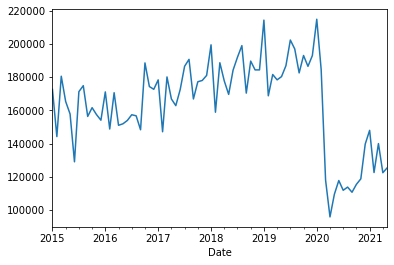

In [65]:
seattle_df.groupby('Date')['Checkouts'].sum().plot()

This is a lot more informative than year alone!

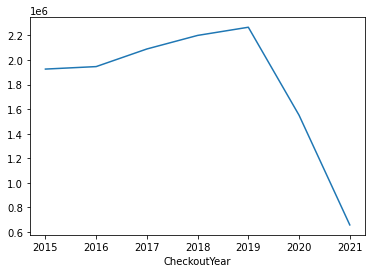

In [66]:
seattle_df.groupby('CheckoutYear')['Checkouts'].sum().plot()

We can do the same thing with our previous plot of material type checkouts over time.

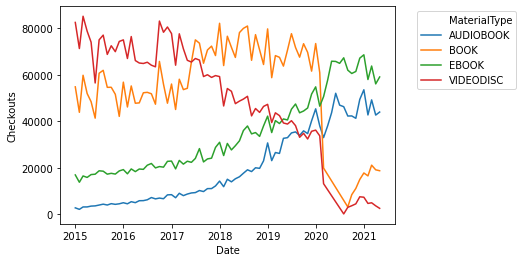

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

materialtype_checkouts_byyear = seattle_df.groupby(['MaterialType', 'Date'])\
                                            [['Checkouts']].sum().reset_index()

top_material_filter = materialtype_checkouts_byyear['MaterialType']\
                        .isin(['BOOK', 'EBOOK', 'AUDIOBOOK', 'VIDEODISC'])

# Use Seaborn to make a line plot
sns.lineplot(data=materialtype_checkouts_byyear[top_material_filter],
             x='Date', y='Checkouts', hue='MaterialType')

# Put legend to the right
plt.legend(bbox_to_anchor=(1.05, 1))

## Datetime Index

| **Pandas Datetime Index Methods** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `df.resample('M')`         | Resample, or essentially group by, different spans of time, e.g., `Y`, `M`, `D`, `17min`                                                |
| `df.loc['2018':'2019']`         | Index by label and slice DataFrame between the years 2018 and 2019                             |

Another common approach to working with time series infromation is to make the datetime column into our Pandas index. There are some special things we can do with a datetime index, such as slice the data by dates more efficiently.

Let's make the "Date" column our index.

In [68]:
seattle_df = seattle_df.set_index('Date')

In [69]:
seattle_df.index

DatetimeIndex(['2016-10-01', '2016-10-01', '2016-10-01', '2016-10-01',
               '2016-10-01', '2016-10-01', '2016-10-01', '2016-10-01',
               '2016-10-01', '2016-10-01',
               ...
               '2021-05-01', '2021-05-01', '2021-05-01', '2021-05-01',
               '2021-05-01', '2021-05-01', '2021-05-01', '2021-05-01',
               '2021-05-01', '2021-05-01'],
              dtype='datetime64[ns]', name='Date', length=282287, freq=None)

In [70]:
type(seattle_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

Another thing we can do with a Datetime Index is to `.resample()`, or essentailly group by, different time period spans.

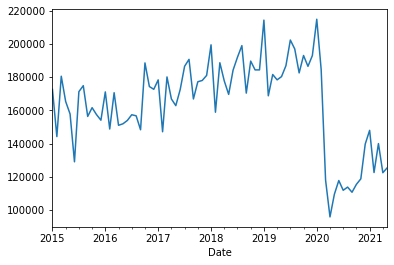

In [71]:
seattle_df.resample('M')['Checkouts'].sum().plot()

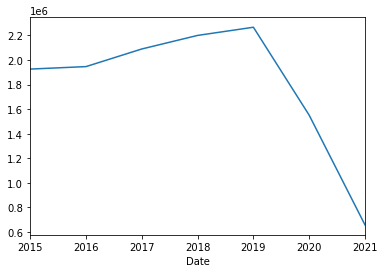

In [72]:
seattle_df.resample('Y')['Checkouts'].sum().plot()

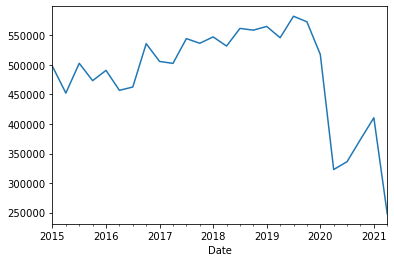

In [73]:
seattle_df.resample('Q')['Checkouts'].sum().plot()

Additionally, because we can use `.loc` to index by date label, we can easily slice the DataFrame between 2019 and 2020.

In [74]:
seattle_df.loc['2019':'2020']

,Title,Creator,MaterialType,Checkouts,CheckoutYear,CheckoutMonth,Publisher,PublicationYear,Subjects,UsageClass,CheckoutType,Big 5,CheckoutYearMonth,CheckoutDay
Date,,,,,,,,,,,,,,
2019-01-01,Anything Is Possible,Elizabeth Strout,EBOOK,79,2019,1,"Random House, Inc.",2017.0,"Fiction, Literature",Digital,OverDrive,Penguin/Random House,2019-1,1
2019-01-01,Freshwater,Akwaeke Emezi,EBOOK,28,2019,1,Lightning Source Inc,2018.0,"Fiction, Literature",Digital,OverDrive,Other,2019-1,1
2019-01-01,Sometimes I Lie,Alice Feeney,EBOOK,43,2019,1,Macmillan Publishers,2018.0,"Fiction, Thriller",Digital,OverDrive,Macmillan,2019-1,1
2019-01-01,The Affair,Lee Child,EBOOK,20,2019,1,"Random House, Inc.",2011.0,"Fiction, Thriller",Digital,OverDrive,Penguin/Random House,2019-1,1
2019-01-01,Life Of The Party,NaN,VIDEODISC,123,2019,1,Warner Bros.,2018.0,"Mothers and daughters Drama, College students Drama, Adult college students Drama, Feature films...",Physical,Horizon,Other,2019-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,The Cuckoo'S Calling,Robert Galbraith,AUDIOBOOK,48,2020,12,"Blackstone Audio, Inc.",2013.0,"Fiction, Mystery",Digital,OverDrive,Other,2020-12,1
2020-12-01,The Chain,Adrian McKinty,EBOOK,30,2020,12,"Hachette Digital, Inc.",2019.0,"Fiction, Suspense, Thriller",Digital,OverDrive,Hachette,2020-12,1
2020-12-01,The Handmaid'S Tale,Margaret Atwood,EBOOK,137,2020,12,Houghton Mifflin Harcourt Trade and Reference,2011.0,"Fiction, Literature",Digital,OverDrive,Other,2020-12,1


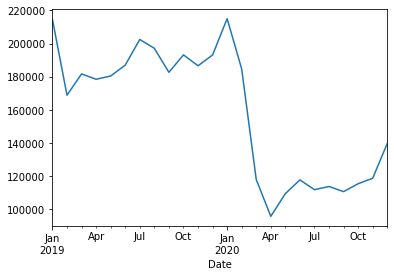

In [75]:
seattle_df.loc['2019':'2020'].resample('M')['Checkouts'].sum().plot()

Or we could slice based on an even more granular dates.

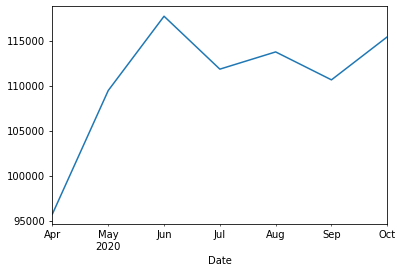

In [76]:
seattle_df.loc['2020-04':'2020-10'].resample('M')['Checkouts'].sum().plot()

## Putting It All Together:
## Plot Checkouts of Specific Titles and Creators Over Time

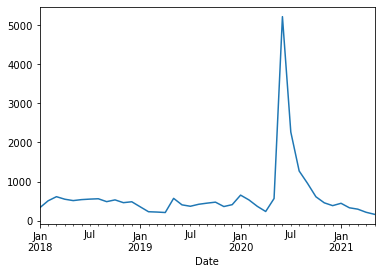

In [77]:
title_filter = seattle_df['Title'].str.contains('So You Want To Talk About Race', na=False, case=False)

seattle_df[title_filter].resample('M')['Checkouts'].sum().plot()

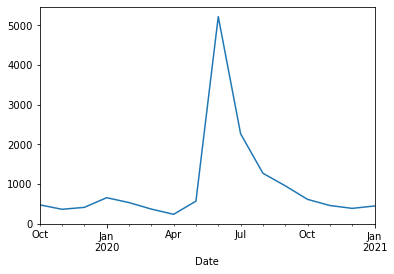

In [78]:
seattle_df[title_filter].loc['2019-10':'2021-01'].resample('M')['Checkouts'].sum().plot()

In [79]:
checkouts_byyear = seattle_df.groupby(['Title','Creator', 'Date', 'MaterialType'])[['Checkouts']].sum().reset_index()
checkouts_byyear

,Title,Creator,Date,MaterialType,Checkouts
0,"""A"" Is For Alibi",Sue Grafton,2017-08-01,EBOOK,20
1,"""A"" Is For Alibi",Sue Grafton,2018-01-01,EBOOK,33
2,"""A"" Is For Alibi",Sue Grafton,2018-02-01,EBOOK,27
3,"""A"" Is For Alibi",Sue Grafton,2018-03-01,EBOOK,27
4,"""A"" Is For Alibi",Sue Grafton,2018-04-01,EBOOK,32
...,...,...,...,...,...
195818,"[Olympians. 9], Artemis","O'Connor, George",2017-07-01,BOOK,21
195819,[Planet Earth,Prince,2019-03-01,SOUNDDISC,20
195820,[Plus] [Sound Recording],"Sheeran, Ed, 1991-",2015-01-01,SOUNDDISC,23
195821,[Plus] [Sound Recording],"Sheeran, Ed, 1991-",2015-03-01,SOUNDDISC,25


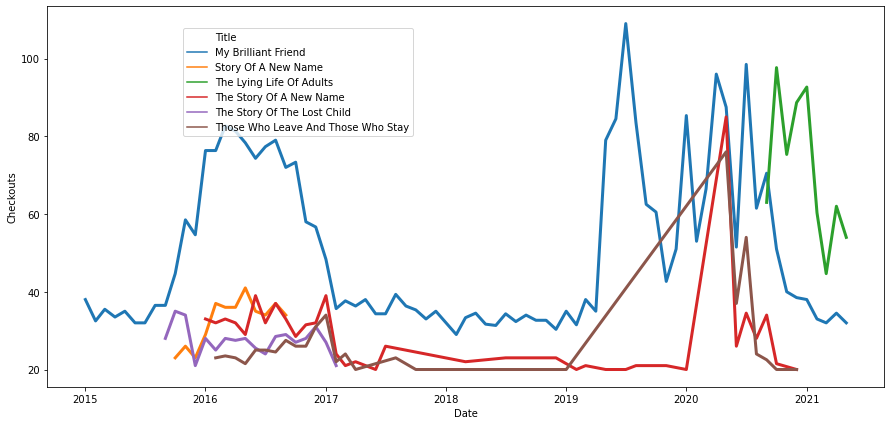

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

creator_filter = checkouts_byyear['Creator'].str.contains('Ferrante')

# Use Seaborn to make a line plot
sns.lineplot(data= checkouts_byyear[creator_filter],
             x='Date', y='Checkouts', hue='Title', lw=3, ci=None)

# Put legend to the right
plt.legend(bbox_to_anchor=(.3, .8),  loc='center')

## Your Turn!

Fill in the code with a Title or Creator of your choice.

In [ ]:
title_filter = seattle_df['Title'].str.contains('Title Of Your Choice', na=False, case=False)

seattle_df[title_filter].resample('M')['Checkouts'].sum().plot()

In [ ]:
plt.figure(figsize=(15,7))

creator_filter = checkouts_byyear['Creator'].str.contains('Creator of Your Choice')

# Use Seaborn to make a line plot
sns.lineplot(data= checkouts_byyear[creator_filter],
             x='Date', y='Checkouts', hue='Title', lw=3, ci=None)

# Put legend to the right
plt.legend(bbox_to_anchor=(.3, .8),  loc='center')

If you're getting a lot of variations of titles, make sure you've applied the `clean_title()` function...

In [ ]:
import re

def clean_title(title):
    
    # Replace some words
    title = title.lower().replace('(unabridged)', '')
    title = title.lower().replace(': a novel', '')
    
    # Use regex expression to remove everything after / or :
    # Test to see if there is a / character
    if re.search('.+?(?=/)/', title):
        # If so, pull out the text before the / character
        title = re.search('.+?(?=/)/', title).group(0)
    
    # Test to see if there is a : character
    if re.search('.+?(?=:)', title):
        # If so, pull out the text before the / character
        title = re.search('.+?(?=:)', title).group(0)
    
    # Strip character and whitespace
    title = title.strip('/')
    title = title.strip()
    
    title = title.title()
    
    return title

In [ ]:
seattle_df['Title'] = seattle_df['Title'].apply(clean_title)